In [136]:
import pandas as pd
import requests
from urllib.parse import urlencode
from datetime import datetime
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

<div class = "alert alert-block alert-info"
     
https://ru.stackoverflow.com/questions/1088300/как-скачивать-файлы-с-яндекс-диска?rq=1
    
вспомнили метод, благодаря которому можно скачать нужные нам данные и передаем данные в юпитер
    

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'  # Сюда вписываете вашу ссылку

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

df = pd.read_csv(download_url)

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'  # Сюда вписываете вашу ссылку

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

df_1 = pd.read_csv(download_url)

In [4]:
# base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
# public_key = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'  # Сюда вписываете вашу ссылку

# # Получаем загрузочную ссылку
# final_url = base_url + urlencode(dict(public_key=public_key))
# response = requests.get(final_url)
# download_url = response.json()['href']

# df_2 = pd.read_csv(download_url)
# ВСЕ ссылки перестали грузить дф, поэтому загрузил их юпитер
df_2 = pd.read_csv('olist_order_items_dataset.csv')

<div class = "alert alert-block alert-info"
<div>
Первое что приходит в голову из описания столбцов из задания: нужно обратить внимание на тип данных связанных с временем и датами.
При просмотре через info(), становится ясно что нужно преобразовать данные к нужному типу данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
df_1[['order_purchase_timestamp', 
      'order_approved_at', 
      'order_delivered_carrier_date', 
      'order_delivered_customer_date', 
      'order_estimated_delivery_date']] = df_1[['order_purchase_timestamp',
                                                'order_approved_at', 
                                                'order_delivered_carrier_date',
                                                'order_delivered_customer_date',
                                                'order_estimated_delivery_date']].apply(pd.to_datetime)

In [9]:
df_2['shipping_limit_date'] = df_2['shipping_limit_date'].apply(pd.to_datetime)

<div class = "alert alert-block alert-info"
<div>
Посмострим на статус ордеров повнимательнее

In [10]:
df_1.groupby(['order_status'], as_index = False)\
    .agg({'order_purchase_timestamp' : 'count'})

,order_status,order_purchase_timestamp
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


исходя из предварительного анализа можно понять, что delivered и shipped оплаченные товары

<div class = "alert alert-block alert-info"
<div>
1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 


In [11]:
one_order= df.merge(df_1, on = 'customer_id')
one_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [12]:
query_one_order = one_order.query('order_status == ["delivered", "shipped", "processing"]')\
    .groupby(['customer_unique_id'],as_index=False)\
    .agg({'order_id' : 'count'})


In [13]:
query_one_order.query("order_id==1").count()

customer_unique_id    91814
order_id              91814
dtype: int64

<div class="alert alert-block alert-success">
Ответ: 91814
<div>

<div class = "alert alert-block alert-info"
<div>
2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

In [14]:
canceled_order = one_order.groupby([one_order.order_purchase_timestamp.dt.to_period("M"), 'order_status'], as_index=False)\
    .agg({'order_id' : 'count'})\
    .groupby('order_status', as_index=False)\
    .agg({'order_id': 'mean'}).round(1)
canceled_order

,order_status,order_id
0,approved,1.0
1,canceled,26.0
2,created,1.7
3,delivered,4194.7
4,invoiced,15.0
5,processing,15.8
6,shipped,48.1
7,unavailable,29.0


In [15]:
canceled_order = canceled_order.query('order_status==["canceled", "unavailable"]')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


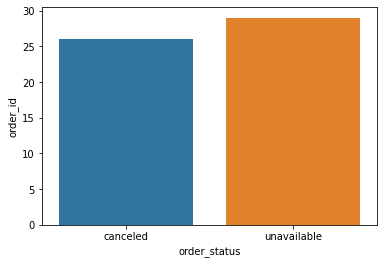

In [16]:
sns.barplot(canceled_order.order_status, canceled_order.order_id)

In [17]:
canceled_order

,order_status,order_id
1,canceled,26.0
7,unavailable,29.0


<div class="alert alert-block alert-success">
Ответ: представлен в виде барплота и в значении canceled_order 
<div>




<div class = "alert alert-block alert-info"
<div>
3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [18]:
max_order_day = df_1.merge(df_2, on = 'order_id')
max_order_day.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [19]:
max_order_day['order_approved_at'] = max_order_day.order_approved_at.dt.day_name()

In [20]:
quere_max_order_day = max_order_day.query('order_status == ["created", "approved", "invoiced", "processing", "shipped", "delivered"]')

In [21]:
quere_max_order_day.groupby(['order_approved_at', 'product_id'], as_index=False)\
    .agg({'order_item_id' : 'count'})\
    .groupby(('product_id'), as_index=False)\
    .max()\
    .sort_values('order_item_id',ascending=False)\
    .rename(columns= {'order_item_id':'count'})

,product_id,order_approved_at,count
21957,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,119
10787,53b36df67ebb7c41585e8d54d6772e08,Wednesday,105
8553,422879e10f46682990de24d770e7f83d,Wednesday,89
19597,99a4788cb24856965c36a24e339b6058,Wednesday,82
7032,368c6c730842d78016ad823897a372db,Wednesday,80
...,...,...,...
12645,628cfb8a45c95a7b796ea06b006e9384,Saturday,1
12643,628b17449083fb34688b2959b80bdecd,Wednesday,1
12642,62892a47bea324c325a4556b66baef9d,Thursday,1
12641,62874f62bbdeec35f7cd827b1716c47e,Wednesday,1


<div class="alert alert-block alert-success">
Ответ: вывели по каждому товару в какой день недели он чаще всего приобретается и сделали сортировку от больше к меньшему
<div>

<div class = "alert alert-block alert-info"
<div>
4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)

In [22]:
mean_week_order = one_order
mean_week_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [23]:
mean_week_order['mounth'] = mean_week_order.order_purchase_timestamp.dt.strftime('%Y-%m')

In [24]:
mean_week_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,mounth
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07


<div class = "alert alert-block alert-info"
<div>
Для работы нам понадобяться приведенные ниже колонки

In [25]:
mean_week = mean_week_order[['customer_unique_id', 'order_id','order_approved_at']]
mean_week.head()

,customer_unique_id,order_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09


In [26]:
#добавим колонку month и преобразуем сразу к формату "месяц"
mean_week['month'] = mean_week.order_approved_at.dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
mean_week.head()

,customer_unique_id,order_id,order_approved_at,month
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,2018-07


<div class = "alert alert-block alert-info"
<div>
сгрупируем данные и посчитаем количество ордеров

In [28]:
x = mean_week.groupby(['customer_unique_id', 'month'], as_index=False)\
    .agg({'order_id' : 'count'})\
    .rename(columns = {'order_id' : 'order_count'})
x

,customer_unique_id,month,order_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
97907,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
97908,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
97909,ffff371b4d645b6ecea244b27531430a,2017-02,1
97910,ffff5962728ec6157033ef9805bacc48,2018-05,1


In [29]:
x.sort_values('order_count')

,customer_unique_id,month,order_count
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
65062,a9da5a115fdd7b13412153e54dc02604,2018-04,1
65061,a9d935a890e7b3d7a15dc0ed603b1af9,2017-10,1
65060,a9d91b01596a92bb257b5b3a5490ef20,2018-01,1
65059,a9d8744833cf1b0851a88057fcd56078,2017-05,1
...,...,...,...
76689,c8460e4251689ba205045f3ea17884a1,2018-08,4
62114,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4


<div class = "alert alert-block alert-info"
<div>
Чтобы посчитать средее количество заказов в неделю  сначала создадим колонку сколько недель в месяце.
Так как в задании было уделен акцент на количество недель при округлениии, то проще сделать это через round (округляем до 2 знаков, тем самым мы сможем избежать округления в большую сторону и целое число отсанется не тронутым)

In [30]:
mean_week = x.assign(weeks_in_month = round(x.month.dt.days_in_month/7, 2)) # Assign — это метод в библиотеке Pandas, который позволяет добавлять столбцы в датафрейм.
mean_week.head()

,customer_unique_id,month,order_count,weeks_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.43
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.43
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.43
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.43
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.29


<div class = "alert alert-block alert-info"
<div>
Далее выполниим задачу, чтобы ответить на поставленный вопрос

In [31]:
mean_week['avg_mean'] = round(mean_week.order_count / mean_week.weeks_in_month,2)
mean_week.head()

,customer_unique_id,month,order_count,weeks_in_month,avg_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.43,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.43,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.43,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.43,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.29,0.23


<div class="alert alert-block alert-success">
Ответ: Среднее количество покупок в неделю содержиться в колонке 'avg_mean
'
<div>

<div class = "alert alert-block alert-info"
<div>
5.1. Выполните когортный анализ пользователей с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

<div class = "alert alert-block alert-info"
<div>
Для начала подумаем над самим заданием и его формулировкой.
Под retention ("удержание") мы понимаение возвращается ли клиент после покупки, чтобы совершить новое приобретения товара. Тем самым за указаный период мы должны проанализировать данные и найти пользователей, кто чаще всего делал покупки за анализируемый период времени.
Возьмем за основу для работы данные из "one_order", так как там содержать отобраные нужные нам состояния покупок

In [32]:
one_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,mounth
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07


In [33]:
y = one_order.order_purchase_timestamp.dt.to_period("Y")

In [34]:
y.value_counts()

2018    54011
2017    45101
2016      329
Freq: A-DEC, Name: order_purchase_timestamp, dtype: int64

In [35]:
z = one_order.order_purchase_timestamp.dt.to_period("M")
z.sort_values()

84697    2016-09
21125    2016-09
70561    2016-09
84845    2016-09
77451    2016-10
          ...   
50487    2018-09
75902    2018-10
68312    2018-10
85415    2018-10
69139    2018-10
Name: order_purchase_timestamp, Length: 99441, dtype: period[M]

<div class = "alert alert-block alert-info"
<div>
Из приведенных выше данных, можем сделать вывод что для кагорного анализа, нам нужно будет взять за основу 2017 г., так как по этому году есть полная отчетность



Далее возьмем данные с самым первым заказом у каждого уникального пользователя

In [90]:
first_order = one_order.query('order_status == ["delivered", "shipped", "processing"]')\
    .groupby('customer_unique_id', as_index=False)\
    .agg({'order_approved_at' : 'min'})\
    .rename(columns = {'order_approved_at' : 'first_order_my'})
first_order.head()

,customer_unique_id,first_order_my
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52


Для удобства приведем к формату год и месяц

In [91]:
first_order['first_order'] = first_order.first_order_my.dt.strftime('%Y-%m')

In [92]:
first_order.head()

,customer_unique_id,first_order_my,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,2017-11


теперь отберем нужный нам год

сделаем это через диапозон

In [93]:
first_order_17 = first_order[(first_order.first_order > '2016-12') & (first_order.first_order < '2018-01')]

In [94]:
first_order_17.first_order.unique()

array(['2017-03', '2017-10', '2017-11', '2017-07', '2017-08', '2017-09',
       '2017-12', '2017-01', '2017-04', '2017-06', '2017-02', '2017-05'],
      dtype=object)

Выведем все покупки в месяц

In [107]:
one_order = one_order.query('order_status == ["delivered", "shipped", "processing"]')

In [108]:
one_order['other_bay'] = one_order.order_approved_at.dt.strftime("%Y-%m")

Смержим два полученных фрейма, чтобы получить таблицу с уникальными пользователями, месяцами их первых покупок и месяцами остальных покупок

In [109]:
buys = first_order_17.merge(one_order[['other_bay','customer_unique_id']], on='customer_unique_id', how='left') 

In [112]:
buys.head()

,customer_unique_id,first_order_my,first_order,other_bay
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,2017-10,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,2017-11,2017-11
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:43:26,2017-03,2017-03
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:30:22,2017-07,2017-07


In [118]:
 buys.customer_unique_id.nunique()

42789

 Теперь перегруппируем полученный фрейм, чтобы получить количество уникальных клиентов, которые сделали первую покупку в month_of_first_buy, и в other_buy. Также создадим фрейм, в котором посчитаем количество покупок в месяц.

In [116]:
unique_buy = buys.groupby(['first_order','other_bay'],as_index = False)\
    .agg({'customer_unique_id':'nunique'})\
    .rename(columns = {'customer_unique_id':'quantity_of_uniq_clients'})

In [117]:
unique_buy.head()

,first_order,other_bay,quantity_of_uniq_clients
0,2017-01,2017-01,705
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [119]:
first_month_buy = buys.groupby(['first_order'],as_index=False)\
    .agg({'customer_unique_id':'nunique'})\
    .rename(columns ={'customer_unique_id':'unique_customers'})

In [122]:
first_month_buy.head()

,first_order,unique_customers
0,2017-01,705
1,2017-02,1661
2,2017-03,2577
3,2017-04,2286
4,2017-05,3527


 Создадим финальный фрейм для расчета "retention rate".

In [124]:
final_table = unique_buy.merge(first_month_buy, on = 'first_order', how = 'left')

In [125]:
final_table.head()

,first_order,other_bay,quantity_of_uniq_clients,unique_customers
0,2017-01,2017-01,705,705
1,2017-01,2017-02,4,705
2,2017-01,2017-03,2,705
3,2017-01,2017-04,1,705
4,2017-01,2017-05,3,705


 Так как в полученным фрейме имеются данные для пользователей, которые совершили повторные покупки позже 2017 года (а нам они для исследования не нужны), то избавимся от таких данных.

In [128]:
final_table = final_table[final_table.other_bay <'2018-04']

 Расчитаем "retention rate".

In [129]:
final_table['retention'] = round((final_table['quantity_of_uniq_clients'] / final_table['unique_customers']),4)

Для составления финального фрейма воспользуемся функцией pivot.

In [133]:
retention = final_table.pivot(index = 'first_order', columns = 'other_bay', values = 'retention')

In [134]:
retention

other_bay,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
first_order,,,,,,,,,,,,,,,
2017-01,1.0,0.0057,0.0028,0.0014,0.0043,0.0014,0.0043,0.0014,0.0014,NaN,0.0028,0.0028,0.0071,0.0043,0.0014
2017-02,NaN,1.0000,0.0024,0.0024,0.0018,0.0042,0.0012,0.0024,0.0018,0.0006,0.0018,0.0012,0.0030,0.0012,0.0018
2017-03,NaN,NaN,1.0000,0.0050,0.0035,0.0035,0.0035,0.0016,0.0016,0.0031,0.0031,0.0012,0.0035,0.0012,0.0023
2017-04,NaN,NaN,NaN,1.0000,0.0061,0.0022,0.0017,0.0026,0.0026,0.0035,0.0026,0.0035,0.0017,0.0022,0.0009
2017-05,NaN,NaN,NaN,NaN,1.0000,0.0054,0.0048,0.0040,0.0031,0.0034,0.0043,0.0014,0.0026,0.0026,0.0028
2017-06,NaN,NaN,NaN,NaN,NaN,1.0000,0.0045,0.0035,0.0039,0.0026,0.0032,0.0035,0.0023,0.0013,0.0023
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,0.0053,0.0032,0.0019,0.0034,0.0019,0.0032,0.0011,0.0019
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,0.0068,0.0036,0.0027,0.0039,0.0053,0.0027,0.0027
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,0.0066,0.0049,0.0034,0.0042,0.0027,0.0022


 Для еще большей наглядности воспользуемся "heatmap", который часто используется для представления результатов когортного анализа

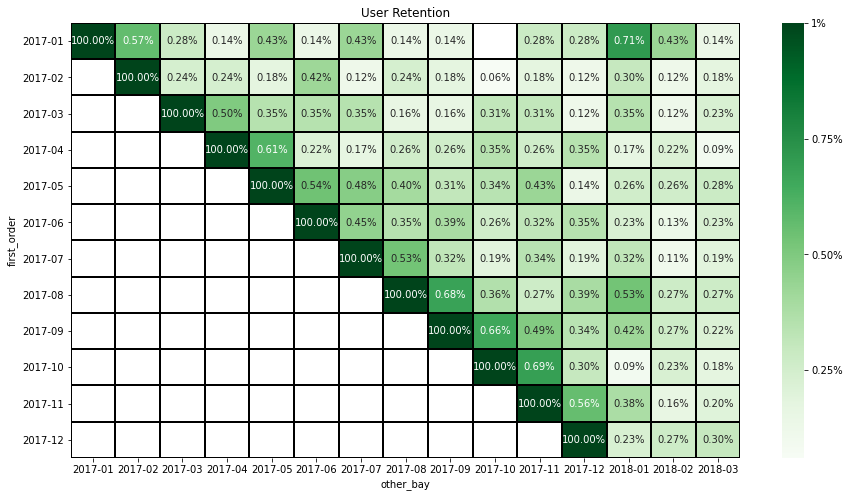

In [138]:
plt.figure(figsize=(15, 8))
plt.title('User Retention')
ax = sns.heatmap(retention, annot=True, fmt='.2%',vmax=0.01, linewidths=1, linecolor='black', cmap = "Greens")
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .0025, .005, .0075, 0.01])
cbar.set_ticklabels(['0%', '0.25%', '0.50%', '0.75%', '1%'])